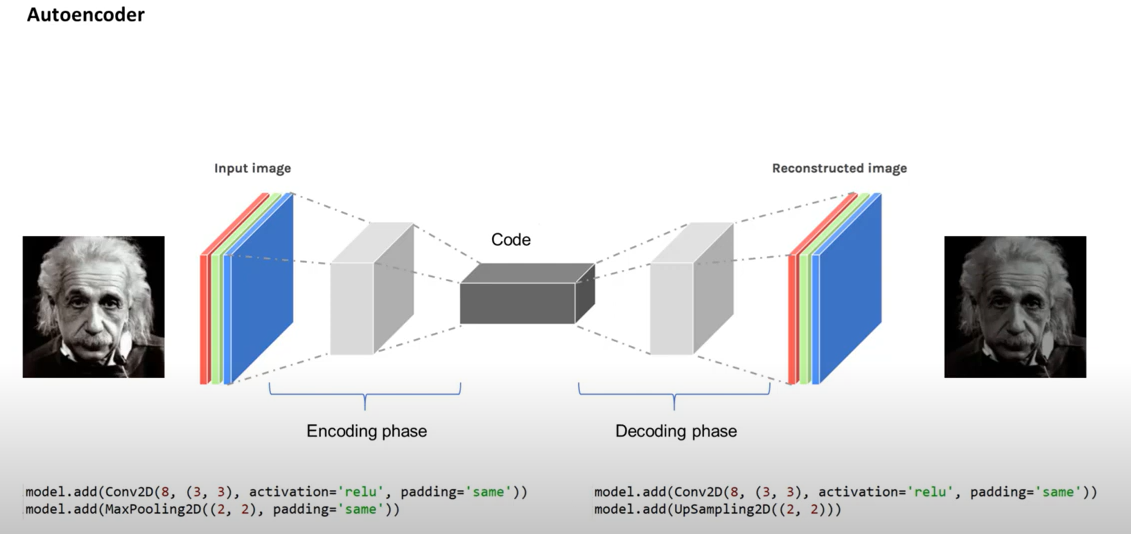

In [2]:
"""
@author: Sreenivas Bhattiprolu
Working great.
Good example to demo image reconstruction using autoencoders
Try: Only 5 epochs, 50 epochs, 500 and 500
"""
from matplotlib.pyplot import imshow
import numpy as np
import cv2
from keras_preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

# Data

In [3]:
SIZE=256
img_data=[]

img=cv2.imread('/content/Mona_Lisa,_by_Leonardo_da_Vinci,_from_C2RMF_retouched.jpg', 1)   #Change 1 to 0 for grey images
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Changing BGR to RGB to show images in true colors
img=cv2.resize(img,(SIZE, SIZE))
img_data.append(img_to_array(img))

img_array = np.reshape(img_data, (len(img_data), SIZE, SIZE, 3))
img_array = img_array.astype('float32') / 255.

# Model

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 

model.add(MaxPooling2D((2, 2), padding='same'))
     
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 128, 128, 8)       2312      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 64, 8)         584       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 8)       

# Train

In [7]:
# model.fit(x,x) input = output
model.fit(img_array, img_array,
        epochs=5000,
        shuffle=True)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 13ms/step - loss: 0.0035 - accuracy: 0.8892
Epoch 2502/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.0035 - accuracy: 0.8883
Epoch 2503/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.0035 - accuracy: 0.8891
Epoch 2504/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.0035 - accuracy: 0.8892
Epoch 2505/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.0035 - accuracy: 0.8893
Epoch 2506/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.0035 - accuracy: 0.8889
Epoch 2507/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.0035 - accuracy: 0.8887
Epoch 2508/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.0035 - accuracy: 0.8890
Epoch 2509/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.0035 - accuracy: 0.8892
Epoch 2510/5000
1/1 [==========================

# Prediction

Neural network output
1/1 [==============================] - 0s 107ms/step


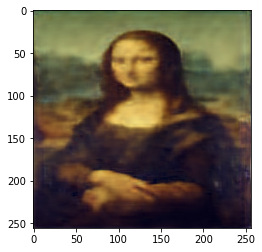

In [8]:
print("Neural network output")
pred = model.predict(img_array)



imshow(pred[0].reshape(SIZE,SIZE,3), cmap="gray")